<a href="https://colab.research.google.com/github/MouadEttali/ComputerVision_DeepLearning/blob/main/OpenCVandPytesseract_for_licensePlateDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



# This notebook uses OpenCV and pytesseract to detect and extact license plate numbers from cards.


In [1]:
!pip install pytesseract
!sudo apt install tesseract-ocr

  Created wheel for pytesseract: filename=pytesseract-0.3.8-py2.py3-none-any.whl size=14072 sha256=eb3262608ee6cbfcbf88d53e51d3ca9540eb80ea3740ad29ac206605ea180a27
  Stored in directory: /root/.cache/pip/wheels/a4/89/b9/3f11250225d0f90e5454fcc30fd1b7208db226850715aa9ace
Successfully built pytesseract
Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 37 not upgraded.
Need to get 4,795 kB of archives.
After this operation, 15.8 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr-eng all 4.00~git24-0e00fe6-1.2 [1,588 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr-osd all 4.00~git24-0e00fe6-1.2 [2,989 kB]
Get:3 http:/

In [2]:
import pytesseract
pytesseract.pytesseract.tesseract_cmd = (
    r'/usr/bin/tesseract'
)

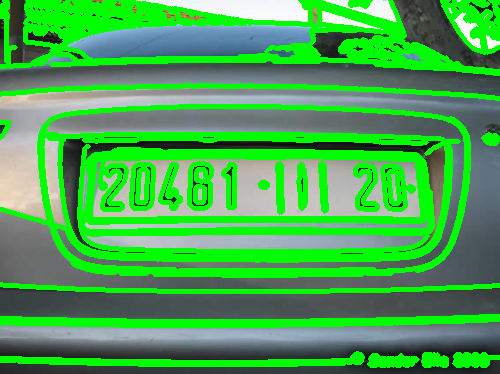

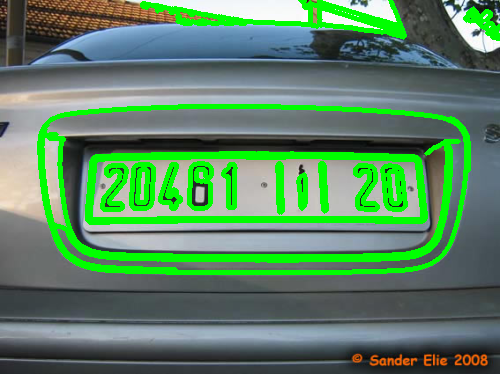

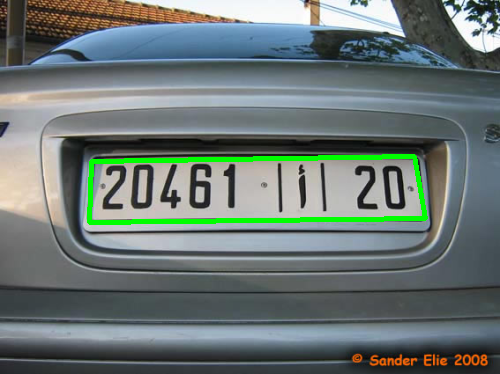

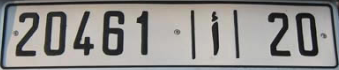

Number is: 20461 -\i| 20:



In [4]:
import cv2
import imutils
import numpy as np
import pytesseract
from google.colab.patches import cv2_imshow
from PIL import Image
img = cv2.imread('/content/P02026.JPG',cv2.IMREAD_COLOR)
img = imutils.resize(img, width=500 )
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) #convert to grey scale
gray = cv2.bilateralFilter(gray, 11, 17, 17) #Blur to reduce noise
edged = cv2.Canny(gray, 30, 200) #Perform Edge detection
cnts,new = cv2.findContours(edged.copy(), cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
img1=img.copy()
cv2.drawContours(img1,cnts,-1,(0,255,0),3)
cv2_imshow(img1)
cnts = sorted(cnts, key = cv2.contourArea, reverse = True)[:30]
screenCnt = None #will store the number plate contour
img2 = img.copy()
cv2.drawContours(img2,cnts,-1,(0,255,0),3) 
cv2_imshow(img2) #top 30 contours

count=0
idx=7
# loop over contours
for c in cnts:
  # approximate the contour
        peri = cv2.arcLength(c, True)
        approx = cv2.approxPolyDP(c, 0.018 * peri, True)
        if len(approx) == 4: #chooses contours with 4 corners
                screenCnt = approx
                x,y,w,h = cv2.boundingRect(c) #finds co-ordinates of the plate
                new_img=img[y:y+h,x:x+w]
                cv2.imwrite('./'+str(idx)+'.png',new_img) #stores the new image
                idx+=1
                break
            #draws the selected contour on original image        
cv2.drawContours(img, [screenCnt], -1, (0, 255, 0), 3)
cv2_imshow(img)

Cropped_loc='./7.png' #the filename of cropped image
cv2_imshow(cv2.imread(Cropped_loc))

text=pytesseract.image_to_string(Cropped_loc,lang='eng') #converts image characters to string
print("Number is:" ,text)
cv2.waitKey(0)
cv2.destroyAllWindows() 
